## Bharat Intern --> Project on Stock Price Prediction


## Importing some Basic Packages

In [146]:
import yfinance as yf
import pandas as pd

In [147]:
sp500 = yf.Ticker("^GSPC")

In [148]:
sp500 = sp500.history(period="max")

In [149]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-08-22 00:00:00-04:00,4415.330078,4418.589844,4382.770020,4387.549805,3522760000,0.0,0.0
2023-08-23 00:00:00-04:00,4396.439941,4443.180176,4396.439941,4436.009766,3837270000,0.0,0.0
2023-08-24 00:00:00-04:00,4455.160156,4458.299805,4375.549805,4376.310059,3723470000,0.0,0.0


In [150]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-08-15 00:00:00-04:00', '2023-08-16 00:00:00-04:00',
               '2023-08-17 00:00:00-04:00', '2023-08-18 00:00:00-04:00',
               '2023-08-21 00:00:00-04:00', '2023-08-22 00:00:00-04:00',
               '2023-08-23 00:00:00-04:00', '2023-08-24 00:00:00-04:00',
               '2023-08-25 00:00:00-04:00', '2023-08-28 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24029, freq=None)

## Doing some basic visualization and data Cleaning

<AxesSubplot:xlabel='Date'>

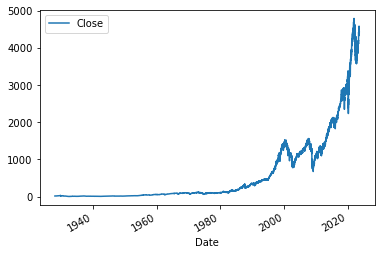

In [151]:
sp500.plot.line(y="Close",use_index=True)

In [152]:
del sp500['Dividends']
del sp500['Stock Splits']

## Setting up the the target variable for machine learning model

In [153]:
sp500['Tommorow'] = sp500['Close'].shift(-1)

In [154]:
sp500

,Open,High,Low,Close,Volume,Tommorow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-08-22 00:00:00-04:00,4415.330078,4418.589844,4382.770020,4387.549805,3522760000,4436.009766
2023-08-23 00:00:00-04:00,4396.439941,4443.180176,4396.439941,4436.009766,3837270000,4376.310059
2023-08-24 00:00:00-04:00,4455.160156,4458.299805,4375.549805,4376.310059,3723470000,4405.709961


In [155]:
sp500['Target'] = (sp500['Tommorow'] > sp500['Close']).astype(int)

In [156]:
sp500

,Open,High,Low,Close,Volume,Tommorow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-08-22 00:00:00-04:00,4415.330078,4418.589844,4382.770020,4387.549805,3522760000,4436.009766,1
2023-08-23 00:00:00-04:00,4396.439941,4443.180176,4396.439941,4436.009766,3837270000,4376.310059,0
2023-08-24 00:00:00-04:00,4455.160156,4458.299805,4375.549805,4376.310059,3723470000,4405.709961,1


In [157]:
sp500 = sp500.loc['1990-01-01':].copy()

In [158]:
sp500

,Open,High,Low,Close,Volume,Tommorow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-08-22 00:00:00-04:00,4415.330078,4418.589844,4382.770020,4387.549805,3522760000,4436.009766,1
2023-08-23 00:00:00-04:00,4396.439941,4443.180176,4396.439941,4436.009766,3837270000,4376.310059,0
2023-08-24 00:00:00-04:00,4455.160156,4458.299805,4375.549805,4376.310059,3723470000,4405.709961,1


## Training a model with Random Forest as it consists of evaluation of bunch of decision trees and are prone to outliers and overfitting, so it can work out very good with these kind of predictions

In [159]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ['Close','Volume','Open','High','Low']
model.fit(train[predictors],train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [160]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [161]:
preds = pd.Series(preds,index=test.index)

In [162]:
preds

Date
2023-04-05 00:00:00-04:00    0
2023-04-06 00:00:00-04:00    0
2023-04-10 00:00:00-04:00    0
2023-04-11 00:00:00-04:00    0
2023-04-12 00:00:00-04:00    0
                            ..
2023-08-22 00:00:00-04:00    1
2023-08-23 00:00:00-04:00    1
2023-08-24 00:00:00-04:00    1
2023-08-25 00:00:00-04:00    0
2023-08-28 00:00:00-04:00    1
Length: 100, dtype: int32

In [163]:
precision_score(test['Target'],preds)

0.5384615384615384

In [164]:
combined = pd.concat([test['Target'],preds],axis=1)

<AxesSubplot:xlabel='Date'>

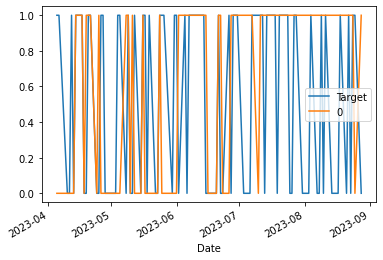

In [165]:
combined.plot()

## Building a more Robust Model with Backtesting feature 

In [166]:
def predict(train,test,predictors,model):
    model.fit(train[predictors],train['Target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name = 'Predictions')
    combined = pd.concat([test['Target'],preds],axis=1)
    return combined

In [167]:
def backtest(data , model , predictors , start = 2500 , step = 250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train,test,predictors,model)
        all_predictions.append(predictions)
        
    return pd.concat(all_predictions)

In [168]:
predictions = backtest(sp500, model, predictors)

In [169]:
predictions['Predictions'].value_counts()

Predictions
0    3434
1    2545
Name: count, dtype: int64

In [170]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5288801571709234

In [171]:
predictions['Target'].value_counts() / predictions.shape[0]

Target
1    0.533701
0    0.466299
Name: count, dtype: float64

## Adding more parameters

In [172]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500['Close'] / rolling_averages['Close']
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()['Target']
    
    new_predictors += [ratio_column, trend_column]

In [173]:
sp500 = sp500.dropna()

In [174]:
sp500

,Open,High,Low,Close,Volume,Tommorow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-21 00:00:00-04:00,4380.279785,4407.549805,4360.299805,4399.770020,3726850000,4387.549805,0,1.003428,1.0,1.000765,1.0,0.995736,33.0,1.080562,119.0,1.144133,532.0
2023-08-22 00:00:00-04:00,4415.330078,4418.589844,4382.770020,4387.549805,3522760000,4436.009766,1,0.998609,1.0,1.000275,1.0,0.992086,32.0,1.077287,119.0,1.140522,531.0
2023-08-23 00:00:00-04:00,4396.439941,4443.180176,4396.439941,4436.009766,3837270000,4376.310059,0,1.005492,1.0,1.009864,2.0,1.002173,32.0,1.088870,119.0,1.152660,532.0


## improving our model

In [175]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [176]:
def predict(train,test,predictors,model):
    model.fit(train[predictors],train['Target'])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    
    preds = pd.Series(preds, index=test.index, name = 'Predictions')
    combined = pd.concat([test['Target'],preds],axis=1)
    return combined

In [177]:
predictions = backtest(sp500, model , new_predictors)

In [178]:
predictions['Predictions'].value_counts()

Predictions
0.0    4158
1.0     820
Name: count, dtype: int64

In [179]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5695121951219512